In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load dataset
tourism_df = pd.read_csv("tourism_with_id.csv")  # Ganti path jika perlu

# Pilih kolom yang relevan
df_selected = tourism_df[['Category', 'Price', 'Rating', 'Lat', 'Long']].copy()

# One-hot encoding untuk kolom 'Category'
encoder = OneHotEncoder()  # versi aman
category_encoded = encoder.fit_transform(df_selected[['Category']]).toarray()  # ubah ke array

# Ambil nama fitur kategori
category_feature_names = encoder.get_feature_names_out(['Category'])

# Buat DataFrame hasil encoding
category_df = pd.DataFrame(category_encoded, columns=category_feature_names)

# Gabungkan dengan fitur numerik lainnya
df_processed = pd.concat([category_df, df_selected[['Price', 'Rating', 'Lat', 'Long']].reset_index(drop=True)], axis=1)

# Standarisasi fitur numerik
scaler = StandardScaler()
df_processed[['Price', 'Rating', 'Lat', 'Long']] = scaler.fit_transform(df_processed[['Price', 'Rating', 'Lat', 'Long']])

# Tampilkan hasil
print(df_processed.head())

   Category_Bahari  Category_Budaya  Category_Cagar Alam  \
0              0.0              1.0                  0.0   
1              0.0              1.0                  0.0   
2              0.0              0.0                  0.0   
3              0.0              0.0                  0.0   
4              0.0              0.0                  0.0   

   Category_Pusat Perbelanjaan  Category_Taman Hiburan  \
0                          0.0                     0.0   
1                          0.0                     0.0   
2                          0.0                     1.0   
3                          0.0                     1.0   
4                          0.0                     1.0   

   Category_Tempat Ibadah     Price    Rating       Lat      Long  
0                     0.0 -0.070094  0.754544  1.266568 -1.189936  
1                     0.0 -0.371434  0.754544  1.318532 -1.195051  
2                     0.0  3.696651  0.754544  1.335510 -1.186679  
3                 

C:\Users\DAVID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DAVID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DAVID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DAVID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

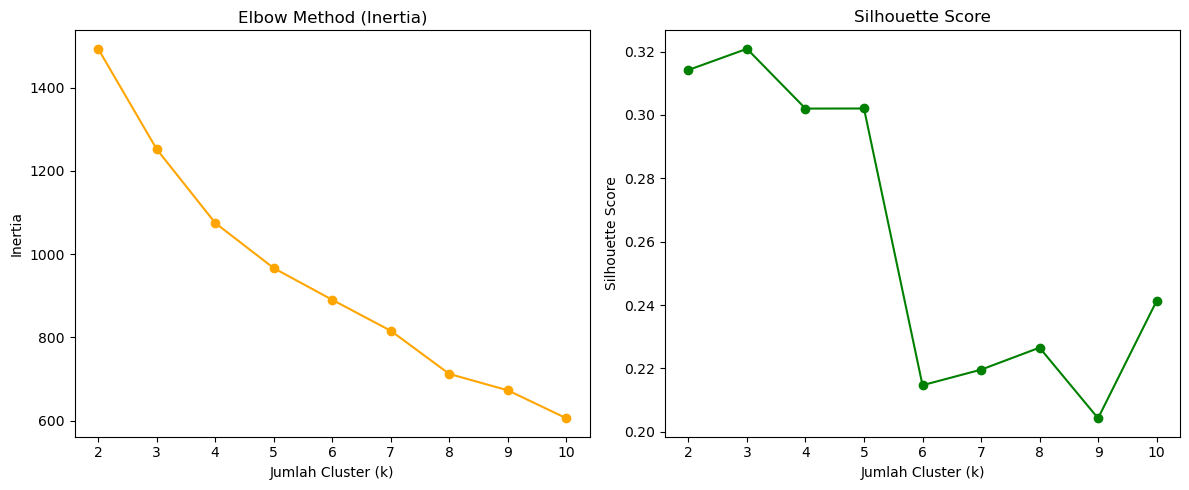

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# List untuk menyimpan inertia dan silhouette score
inertias = []
silhouette_scores = []
k_values = range(2, 11)  # Dari k=2 sampai k=10

# Jalankan K-Means dan hitung metrik untuk setiap nilai k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_processed)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_processed, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o', color='orange')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.cluster import KMeans

# Inisialisasi dan training model K-Means
k = 4
kmeans_final = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(df_processed)

# Tambahkan kolom cluster ke dataset asli
df_clustered = tourism_df.copy()
df_clustered['Cluster'] = labels

# Tampilkan beberapa contoh hasil kluster
print(df_clustered[['Place_Name', 'Category', 'City', 'Rating', 'Price', 'Cluster']].head(10))

                          Place_Name       Category     City  Rating   Price  \
0                   Monumen Nasional         Budaya  Jakarta     4.6   20000   
1                           Kota Tua         Budaya  Jakarta     4.6       0   
2                      Dunia Fantasi  Taman Hiburan  Jakarta     4.6  270000   
3  Taman Mini Indonesia Indah (TMII)  Taman Hiburan  Jakarta     4.5   10000   
4           Atlantis Water Adventure  Taman Hiburan  Jakarta     4.5   94000   
5            Taman Impian Jaya Ancol  Taman Hiburan  Jakarta     4.5   25000   
6             Kebun Binatang Ragunan     Cagar Alam  Jakarta     4.5    4000   
7                      Ocean Ecopark  Taman Hiburan  Jakarta     4.0  180000   
8                   Pelabuhan Marina         Bahari  Jakarta     4.4  175000   
9                       Pulau Tidung         Bahari  Jakarta     4.5  150000   

   Cluster  
0        3  
1        3  
2        0  
3        3  
4        3  
5        3  
6        3  
7        0  
8 

C:\Users\DAVID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Analisis dan Interpretasi Cluster

  Cluster    Rating                Price                 Category
               mean count           mean    median       <lambda>
0       0  4.433333    18  270833.333333  200000.0  Taman Hiburan
1       1  4.100000    68   14176.470588    5250.0     Cagar Alam
2       2  4.506557   183   12693.989071    5000.0         Budaya
3       3  4.513095   168   15541.666667    5000.0         Budaya


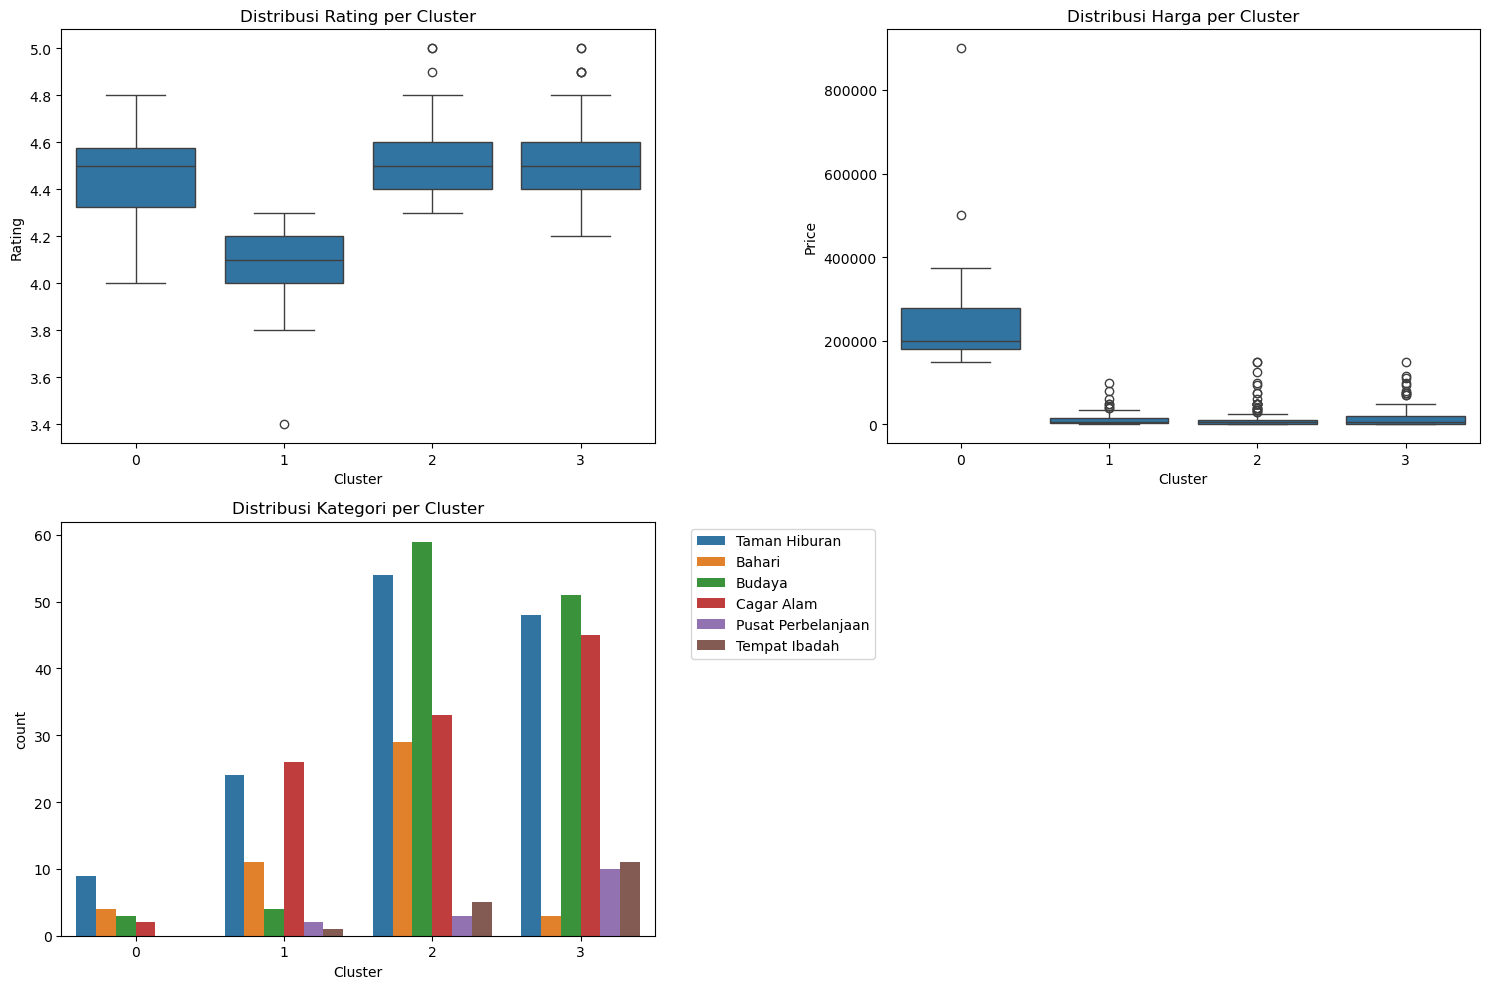

In [11]:
# Analisis karakteristik setiap cluster
cluster_analysis = df_clustered.groupby('Cluster').agg({
    'Rating': ['mean', 'count'],
    'Price': ['mean', 'median'],
    'Category': lambda x: x.mode()[0]
}).reset_index()

print(cluster_analysis)

# Visualisasi distribusi fitur per cluster
import seaborn as sns

plt.figure(figsize=(15, 10))

# Plot distribusi Rating per cluster
plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='Rating', data=df_clustered)
plt.title('Distribusi Rating per Cluster')

# Plot distribusi Price per cluster
plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='Price', data=df_clustered)
plt.title('Distribusi Harga per Cluster')

# Plot distribusi kategori per cluster
plt.subplot(2, 2, 3)
sns.countplot(x='Cluster', hue='Category', data=df_clustered)
plt.title('Distribusi Kategori per Cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### b. Persiapan Integrasi dengan Backend

In [14]:
import joblib

# Simpan model dan preprocessing tools untuk digunakan di backend
model_artifacts = {
    'kmeans_model': kmeans_final,
    'scaler': scaler,
    'encoder': encoder
}

joblib.dump(model_artifacts, 'tourism_recommendation_model.pkl')

# Simpan data dengan cluster untuk referensi
df_clustered.to_csv('tourism_data_with_clusters.csv', index=False)

### Pengembangan Fungsi Rekomendasi

In [31]:
print(type(df_clustered))  # Harusnya <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [33]:
test_result = recommend_places(user_prefs)
print(test_result.shape)  # Harusnya menampilkan jumlah baris dan kolom

(5, 15)


In [35]:
print(recommendations.columns.tolist())

['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Cluster', 'Distance']


In [49]:
recommendations = recommendations.drop(columns=recommendations.columns[recommendations.columns.str.contains('Unnamed')])

In [51]:
def recommend_places(user_preferences, n_recommendations=5):
    """
    Fungsi untuk memberikan rekomendasi tempat wisata berdasarkan preferensi user
    
    Parameters:
    - user_preferences: dict dengan keys: Category, Price, Rating, Lat, Long
    - n_recommendations: jumlah rekomendasi yang ingin ditampilkan
    
    Returns:
    - DataFrame dengan rekomendasi tempat wisata
    """
    # Buat DataFrame dari preferensi user
    user_df = pd.DataFrame([user_preferences])
    
    # Preprocessing data user
    category_encoded = encoder.transform(user_df[['Category']]).toarray()
    category_df = pd.DataFrame(category_encoded, columns=category_feature_names)
    
    # Gabungkan dengan fitur numerik
    user_processed = pd.concat([
        category_df,
        user_df[['Price', 'Rating', 'Lat', 'Long']].reset_index(drop=True)
    ], axis=1)
    
    # Standarisasi fitur numerik
    user_processed[['Price', 'Rating', 'Lat', 'Long']] = scaler.transform(
        user_processed[['Price', 'Rating', 'Lat', 'Long']])
    
    # Prediksi cluster
    cluster = kmeans_final.predict(user_processed)[0]
    
    # Ambil rekomendasi dari cluster yang sama
    recommendations = df_clustered[df_clustered['Cluster'] == cluster].copy()
    
    # Filter tambahan:
    # 1. Pastikan kategori sesuai dengan permintaan user
    recommendations = recommendations[recommendations['Category'] == user_preferences['Category']]
    
    # 2. Hitung jarak dari lokasi user (dalam km)
    from math import radians, sin, cos, sqrt, atan2
    
    def calculate_distance(lat1, lon1, lat2, lon2):
        R = 6371.0  # Radius bumi dalam km
        lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        return R * c
    
    user_lat = user_preferences['Lat']
    user_long = user_preferences['Long']
    
    recommendations['Distance'] = recommendations.apply(
        lambda row: calculate_distance(user_lat, user_long, row['Lat'], row['Long']),
        axis=1
    )
    
    # 3. Filter berdasarkan radius maksimum (misal 50km)
    recommendations = recommendations[recommendations['Distance'] <= 50]
    
    # 4. Urutkan berdasarkan:
    #    - Rating (descending)
    #    - Jarak (ascending)
    #    - Harga (ascending)
    recommendations = recommendations.sort_values(
        by=['Rating', 'Distance', 'Price'],
        ascending=[False, True, True]
    ).head(n_recommendations)
    
    return recommendations

# Contoh penggunaan
user_prefs = {
    'Category': 'Budaya',
    'Price': 20000,
    'Rating': 4.5,
    'Lat': -6.1754,  # Jakarta
    'Long': 106.8272
}

print(recommend_places(user_prefs))

    Place_Id                   Place_Name  \
68        69              Freedom Library   
48        49        Galeri Indonesia Kaya   
69        70        Perpustakaan Nasional   
62        63  Museum Kebangkitan Nasional   
58        59         Museum Sumpah Pemuda   

                                          Description Category     City  \
68  Freedom Library adalah perpustakaan buku yang ...   Budaya  Jakarta   
48  Galeri Indonesia Kaya (disingkat GIK) adalah r...   Budaya  Jakarta   
69  Perpustakaan Nasional adalah perpustakaan yang...   Budaya  Jakarta   
62  Museum Kebangkitan Nasional (bahasa Inggris: M...   Budaya  Jakarta   
58  Museum Sumpah Pemuda adalah sebuah museum seja...   Budaya  Jakarta   

    Price  Rating  Time_Minutes  \
68      0     5.0           NaN   
48      0     4.8          90.0   
69      0     4.7         240.0   
62   2000     4.7          45.0   
58   2000     4.7           NaN   

                                         Coordinate       Lat      

In [53]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Hitung metrik evaluasi clustering
db_score = davies_bouldin_score(df_processed, labels)
ch_score = calinski_harabasz_score(df_processed, labels)

print(f"Davies-Bouldin Index: {db_score:.3f} (Lebih kecil lebih baik)")
print(f"Calinski-Harabasz Index: {ch_score:.3f} (Lebih besar lebih baik)")

# Analisis kualitas berdasarkan metrik
if db_score < 0.5:
    print("Kualitas clustering sangat baik")
elif db_score < 1.0:
    print("Kualitas clustering baik")
else:
    print("Kualitas clustering perlu diperbaiki")

Davies-Bouldin Index: 1.197 (Lebih kecil lebih baik)
Calinski-Harabasz Index: 134.927 (Lebih besar lebih baik)
Kualitas clustering perlu diperbaiki


### Feature Engineerinng

In [62]:
import numpy as np  # Untuk fungsi log1p

In [66]:
import numpy as np
from math import radians, sin, cos, sqrt, atan2

def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Menghitung jarak antara dua titik koordinat (dalam km)
    menggunakan formula Haversine
    """
    R = 6371.0  # Radius bumi dalam km
    
    # Konversi ke radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Selisih koordinat
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # Formula Haversine
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Hitung jarak dari titik referensi (contoh: Monas Jakarta)
reference_lat, reference_lon = -6.1754, 106.8272

df_clustered['Distance'] = df_clustered.apply(
    lambda row: calculate_distance(reference_lat, reference_lon, row['Lat'], row['Long']), 
    axis=1
)

# Sekarang Anda bisa membuat kolom baru
df_clustered['Popularity_Score'] = df_clustered['Rating'] * np.log1p(df_clustered['Price'])
df_clustered['Accessibility'] = 1 / df_clustered['Distance']

# Tampilkan hasil
print(df_clustered[['Place_Name', 'Distance', 'Popularity_Score', 'Accessibility']].head())

                          Place_Name   Distance  Popularity_Score  \
0                   Monumen Nasional   0.005286         45.556273   
1                           Kota Tua   4.343444          0.000000   
2                      Dunia Fantasi   5.613387         57.528432   
3  Taman Mini Indonesia Indah (TMII)  15.999757         41.446982   
4           Atlantis Water Adventure   5.845142         51.529773   

   Accessibility  
0     189.181263  
1       0.230232  
2       0.178146  
3       0.062501  
4       0.171082  


In [68]:
# Cek kolom yang tersedia
print("Kolom yang ada:", df_clustered.columns.tolist())

# Jika Distance tidak ada, gunakan alternatif lain misalnya:
df_clustered['Accessibility'] = 1 / (df_clustered['Price'] + 1)  # Contoh alternatif

Kolom yang ada: ['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12', 'Cluster', 'Popularity_Score', 'Distance', 'Accessibility']


In [70]:
# Gabungkan dengan DataFrame yang memiliki Distance
if 'Distance' in tourism_df.columns:
    df_clustered = df_clustered.merge(
        tourism_df[['Place_Id', 'Distance']],
        on='Place_Id',
        how='left'
    )

In [72]:
df_clustered['Accessibility'] = 1 / (df_clustered['Distance'] + 0.0001)

In [76]:
print(df_clustered.columns.tolist())  # atau tourism_df.columns.tolist()

['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12', 'Cluster', 'Popularity_Score', 'Distance', 'Accessibility']


In [78]:
from math import radians, sin, cos, sqrt, atan2

def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius bumi dalam km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Contoh: hitung jarak dari titik pusat Jakarta
jakarta_lat, jakarta_lon = -6.1754, 106.8272
df_clustered['Distance'] = df_clustered.apply(
    lambda row: calculate_distance(jakarta_lat, jakarta_lon, row['Lat'], row['Long']),
    axis=1
)

In [80]:
import numpy as np
import pandas as pd
from math import radians, sin, cos, sqrt, atan2

# 1. Pastikan df_clustered sudah terdefinisi
print("Kolom yang tersedia:", df_clustered.columns.tolist())

# 2. Jika Distance belum ada, hitung terlebih dahulu
if 'Distance' not in df_clustered.columns:
    print("Menghitung kolom Distance...")
    # Fungsi haversine
    def calculate_distance(lat1, lon1, lat2, lon2):
        R = 6371.0
        lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        return R * c
    
    # Hitung jarak dari titik referensi (contoh: Monas Jakarta)
    reference_point = (-6.1754, 106.8272)  # Lat, Long Monas
    df_clustered['Distance'] = df_clustered.apply(
        lambda row: calculate_distance(reference_point[0], reference_point[1], row['Lat'], row['Long']),
        axis=1
    )

# 3. Tambahkan fitur baru
df_clustered['Popularity_Score'] = df_clustered['Rating'] * np.log1p(df_clustered['Price'])
df_clustered['Accessibility'] = 1 / df_clustered['Distance']

# 4. Tampilkan hasil
print(df_clustered[['Place_Name', 'Rating', 'Price', 'Distance', 'Popularity_Score', 'Accessibility']].head())

Kolom yang tersedia: ['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12', 'Cluster', 'Popularity_Score', 'Distance', 'Accessibility']
                          Place_Name  Rating   Price   Distance  \
0                   Monumen Nasional     4.6   20000   0.005286   
1                           Kota Tua     4.6       0   4.343444   
2                      Dunia Fantasi     4.6  270000   5.613387   
3  Taman Mini Indonesia Indah (TMII)     4.5   10000  15.999757   
4           Atlantis Water Adventure     4.5   94000   5.845142   

   Popularity_Score  Accessibility  
0         45.556273     189.181263  
1          0.000000       0.230232  
2         57.528432       0.178146  
3         41.446982       0.062501  
4         51.529773       0.171082  


In [82]:
# Gabungkan fitur baru ke df_processed
df_processed = pd.concat([
    df_processed,
    df_clustered[['Popularity_Score', 'Accessibility']]
], axis=1)

# Standarisasi fitur baru
scaler = StandardScaler()
df_processed[['Popularity_Score', 'Accessibility']] = scaler.fit_transform(
    df_processed[['Popularity_Score', 'Accessibility']]
)

### Langkah 2: Optimasi Jumlah Cluster
Ulangi analisis elbow method dan silhouette score dengan fitur yang diperkaya:

C:\Users\DAVID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DAVID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DAVID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DAVID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

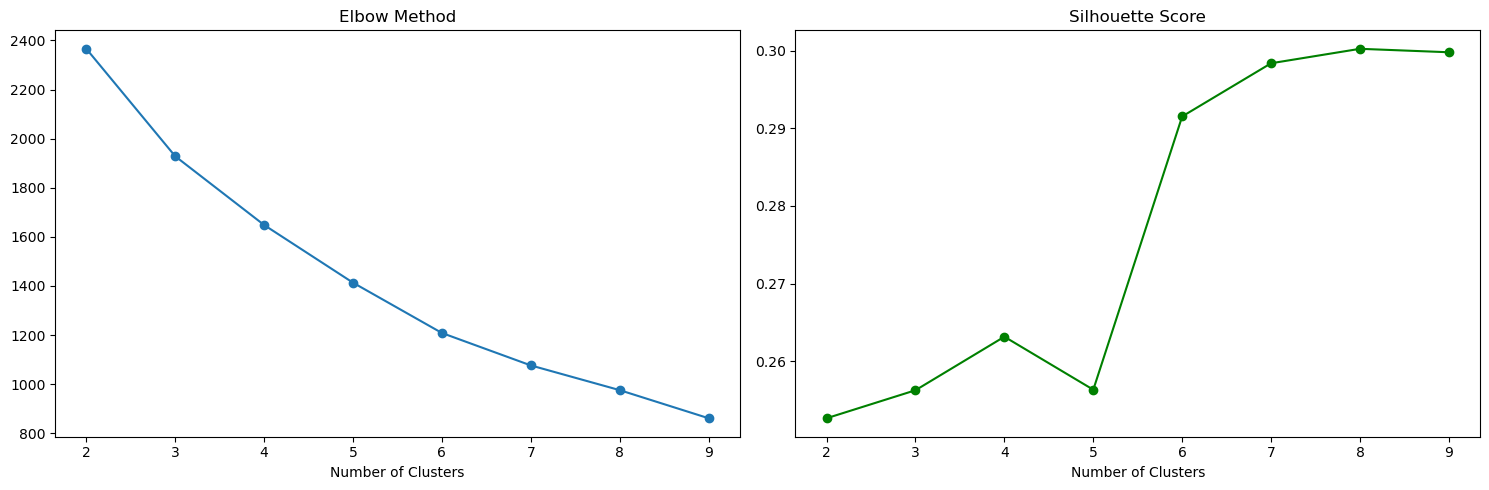

In [85]:
# Analisis jumlah cluster optimal
inertias = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_processed)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_processed, labels))

# Plot hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.tight_layout()
plt.show()

### Langkah 3: Training Model dengan Cluster Optimal

In [88]:
# Pilih k optimal berdasarkan plot sebelumnya (contoh: k=5)
k_optimal = 5  
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_clustered['New_Cluster'] = kmeans_final.fit_predict(df_processed)

# Analisis karakteristik cluster baru
cluster_analysis = df_clustered.groupby('New_Cluster').agg({
    'Rating': 'mean',
    'Price': ['mean', 'median'],
    'Distance': 'mean',
    'Popularity_Score': 'mean',
    'Category': lambda x: x.mode()[0]
}).reset_index()

print(cluster_analysis)

  New_Cluster    Rating          Price              Distance Popularity_Score  \
                   mean           mean    median        mean             mean   
0           0  4.416561   17328.025478   10000.0  457.582928        40.533965   
1           1  4.394400   25260.000000   15000.0   83.000391        41.853210   
2           2  4.600000   20000.000000   20000.0    0.005286        45.556273   
3           3  4.517647       0.000000       0.0  296.020023         0.000000   
4           4  4.433333  270833.333333  200000.0  177.924215        54.951754   

        Category  
        <lambda>  
0     Cagar Alam  
1     Cagar Alam  
2         Budaya  
3         Budaya  
4  Taman Hiburan  


C:\Users\DAVID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Langkah 4: Visualisasi Hasil Clustering


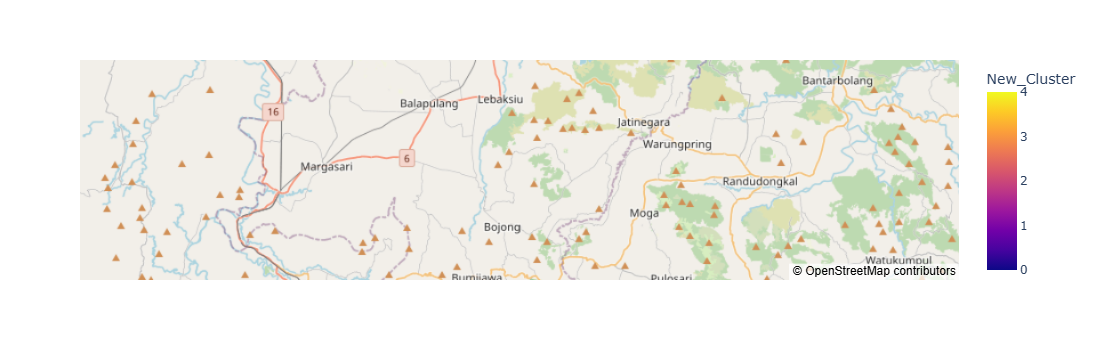

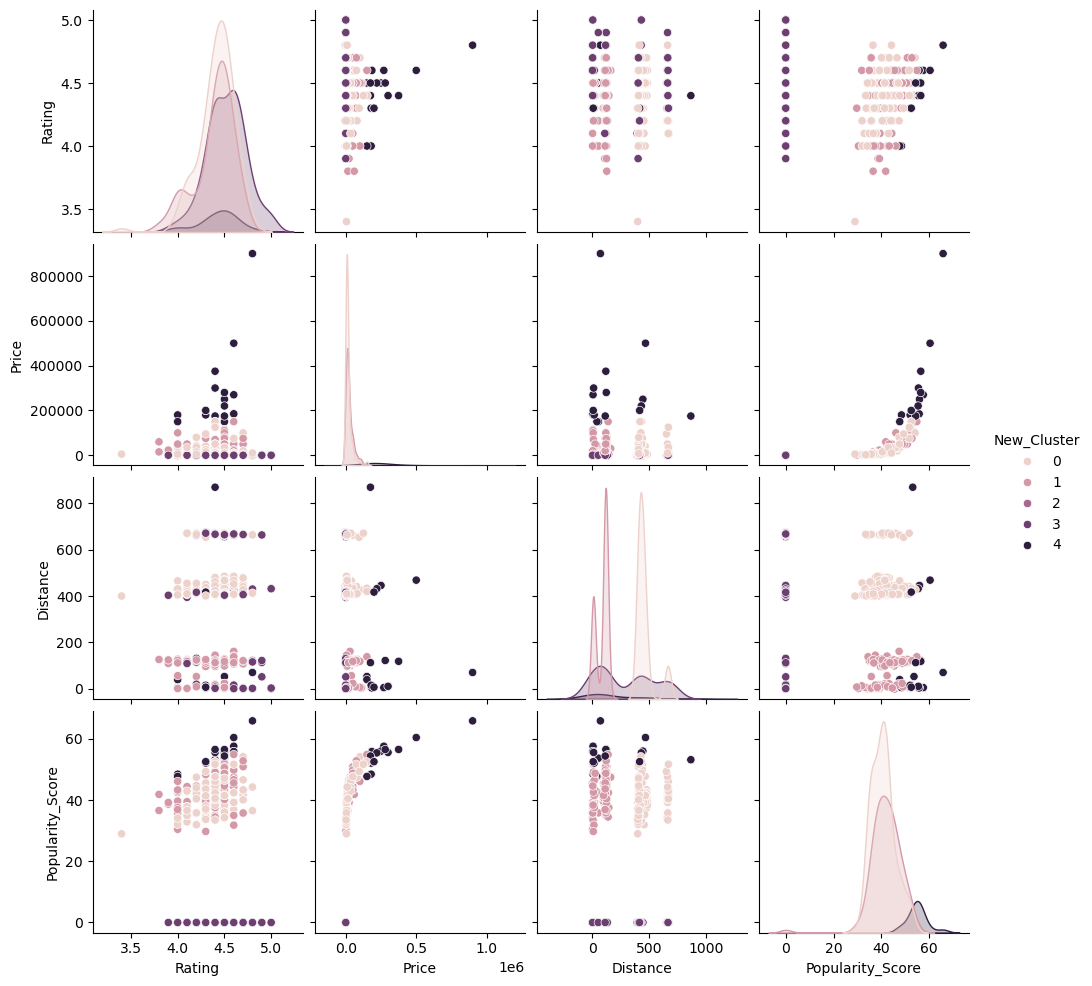

In [91]:
import plotly.express as px

# Visualisasi geografis
fig = px.scatter_mapbox(df_clustered,
                        lat="Lat",
                        lon="Long",
                        color="New_Cluster",
                        hover_name="Place_Name",
                        hover_data=["Category", "Rating", "Price"],
                        zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

# Visualisasi hubungan fitur
sns.pairplot(df_clustered, 
             vars=['Rating', 'Price', 'Distance', 'Popularity_Score'],
             hue='New_Cluster')
plt.show()

Langkah 5: Persiapan Integrasi dengan Backend
Simpan model terbaru:

In [94]:
import joblib

model_artifacts = {
    'kmeans_model': kmeans_final,
    'scaler': scaler,
    'encoder': encoder
}

joblib.dump(model_artifacts, 'improved_tourism_model.pkl')

['improved_tourism_model.pkl']

Update fungsi rekomendasi untuk menggunakan fitur baru:



In [101]:
def improved_recommendation(user_prefs, n=5):
    # [Kode sebelumnya...]
    
    # Tambahkan fitur baru ke data user
    user_processed['Popularity_Score'] = user_prefs['Rating'] * np.log1p(user_prefs['Price'])
    user_processed['Accessibility'] = 1 / user_prefs['Distance']
    
    # Standarisasi
    user_processed[['Popularity_Score', 'Accessibility']] = scaler.transform(
        user_processed[['Popularity_Score', 'Accessibility']]
    )
    
    # [Lanjutkan dengan prediksi cluster...]

In [107]:
def improved_recommendation(user_prefs, n_recommendations=5):
    """
    Fungsi rekomendasi yang sudah diperbaiki dengan penanganan error
    """
    try:
        # 1. Buat DataFrame dari input user
        user_df = pd.DataFrame([user_prefs])
        
        # 2. Preprocessing data user
        # One-hot encoding untuk kategori
        category_encoded = encoder.transform(user_df[['Category']]).toarray()
        category_df = pd.DataFrame(category_encoded, 
                                 columns=encoder.get_feature_names_out(['Category']))
        
        # 3. Hitung fitur baru
        user_df['Popularity_Score'] = user_df['Rating'] * np.log1p(user_df['Price'])
        user_df['Accessibility'] = 1 / (user_df['Distance'] + 1e-6)  # Hindari division by zero
        
        # 4. Gabungkan semua fitur
        user_processed = pd.concat([
            category_df,
            user_df[['Price', 'Rating', 'Lat', 'Long', 'Popularity_Score', 'Accessibility']]
        ], axis=1)
        
        # 5. Standarisasi fitur numerik
        numeric_cols = ['Price', 'Rating', 'Lat', 'Long', 'Popularity_Score', 'Accessibility']
        user_processed[numeric_cols] = scaler.transform(user_processed[numeric_cols])
        
        # 6. Konversi ke numpy array dan pastikan tipe data float
        X_user = user_processed.values.astype(np.float64)
        
        # 7. Prediksi cluster
        cluster_label = kmeans_final.predict(X_user)[0]
        
        # 8. Ambil rekomendasi
        recommendations = df_clustered[
            (df_clustered['New_Cluster'] == cluster_label) &
            (df_clustered['Category'] == user_prefs['Category']) &
            (df_clustered['Distance'] <= 50)
        ].copy()
        
        # 9. Urutkan dan ambil top N
        if len(recommendations) > 0:
            recommendations = recommendations.sort_values(
                by=['Popularity_Score', 'Accessibility', 'Rating'],
                ascending=[False, False, False]
            ).head(n_recommendations)
            
            return recommendations.reset_index(drop=True)
        else:
            print("Tidak ditemukan rekomendasi yang sesuai, memperlebar kriteria...")
            # Fallback: cari tanpa filter kategori
            return df_clustered[
                df_clustered['New_Cluster'] == cluster_label
            ].sort_values('Popularity_Score').head(n_recommendations)
            
    except Exception as e:
        print(f"Error dalam proses rekomendasi: {str(e)}")
        return pd.DataFrame()  # Return DataFrame kosong jika error

In [117]:
# Setelah training model
feature_order = list(encoder.get_feature_names_out(['Category'])) + ['Price', 'Rating', 'Lat', 'Long', 'Popularity_Score', 'Accessibility']
joblib.dump(feature_order, 'feature_order.pkl')

['feature_order.pkl']

In [121]:
def improved_recommendation(user_prefs, n_recommendations=5):
    """
    Fungsi rekomendasi dengan penanganan nama fitur yang konsisten
    """
    try:
        # 1. Buat DataFrame dari input user
        user_df = pd.DataFrame([user_prefs])
        
        # 2. Preprocessing - Pastikan urutan dan nama fitur sama dengan saat training
        # One-hot encoding untuk kategori
        category_encoded = encoder.transform(user_df[['Category']]).toarray()
        category_cols = encoder.get_feature_names_out(['Category'])
        category_df = pd.DataFrame(category_encoded, columns=category_cols)
        
        # 3. Hitung fitur baru
        user_df['Popularity_Score'] = user_df['Rating'] * np.log1p(user_df['Price'])
        user_df['Accessibility'] = 1 / (user_df['Distance'] + 1e-6)  # Hindari division by zero
        
        # 4. Susun fitur dengan urutan yang sama seperti saat training
        # Contoh urutan fitur saat training: 
        # ['Category_Bahari', 'Category_Budaya', ..., 'Price', 'Rating', 'Lat', 'Long', 'Popularity_Score', 'Accessibility']
        numeric_features = ['Price', 'Rating', 'Lat', 'Long', 'Popularity_Score', 'Accessibility']
        
        # Gabungkan semua fitur dengan urutan yang benar
        user_processed = pd.concat([
            category_df,
            user_df[numeric_features]
        ], axis=1)
        
        # 5. Standarisasi fitur numerik
        user_processed[numeric_features] = scaler.transform(user_processed[numeric_features])
        
        # 6. Konversi ke numpy array dengan urutan fitur yang konsisten
        # Pastikan urutan kolom sama persis dengan saat training
        feature_order = list(category_cols) + numeric_features
        X_user = user_processed[feature_order].values.astype(np.float32)
        
        # 7. Prediksi cluster
        cluster_label = kmeans_final.predict(X_user)[0]
        
        # 8. Ambil rekomendasi
        recommendations = df_clustered[
            (df_clustered['New_Cluster'] == cluster_label) &
            (df_clustered['Category'] == user_prefs['Category']) &
            (df_clustered['Distance'] <= 50)
        ].copy()
        
        # 9. Return hasil
        if len(recommendations) > 0:
            return recommendations.sort_values(
                by=['Popularity_Score', 'Accessibility', 'Rating'],
                ascending=[False, False, False]
            ).head(n_recommendations)
        else:
            print("Tidak ada rekomendasi, mencoba tanpa filter kategori...")
            return df_clustered[
                df_clustered['New_Cluster'] == cluster_label
            ].sort_values('Popularity_Score').head(n_recommendations)
            
    except Exception as e:
        print(f"Error: {str(e)}")
        return pd.DataFrame()

# Contoh penggunaan
user_prefs = {
    'Category': 'Budaya',
    'Price': 20000,
    'Rating': 4.5,
    'Lat': -6.1754,
    'Long': 106.8272,
    'Distance': 10
}

result = improved_recommendation(user_prefs)
if not result.empty:
    print(result[['Place_Name', 'Category', 'Rating', 'Price', 'Distance']])
else:
    print("Gagal memberikan rekomendasi")

Error: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Lat
- Long
- Price
- Rating

Gagal memberikan rekomendasi


In [113]:
def improved_recommendation(user_prefs, n_recommendations=5):
    """
    Fungsi rekomendasi dengan penanganan nama fitur yang konsisten
    """
    try:
        # 1. Buat DataFrame dari input user
        user_df = pd.DataFrame([user_prefs])
        
        # 2. Preprocessing - Pastikan urutan dan nama fitur sama dengan saat training
        # One-hot encoding untuk kategori
        category_encoded = encoder.transform(user_df[['Category']]).toarray()
        category_cols = encoder.get_feature_names_out(['Category'])
        category_df = pd.DataFrame(category_encoded, columns=category_cols)
        
        # 3. Hitung fitur baru
        user_df['Popularity_Score'] = user_df['Rating'] * np.log1p(user_df['Price'])
        user_df['Accessibility'] = 1 / (user_df['Distance'] + 1e-6)  # Hindari division by zero
        
        # 4. Susun fitur dengan urutan yang sama seperti saat training
        # Contoh urutan fitur saat training: 
        # ['Category_Bahari', 'Category_Budaya', ..., 'Price', 'Rating', 'Lat', 'Long', 'Popularity_Score', 'Accessibility']
        numeric_features = ['Price', 'Rating', 'Lat', 'Long', 'Popularity_Score', 'Accessibility']
        
        # Gabungkan semua fitur dengan urutan yang benar
        user_processed = pd.concat([
            category_df,
            user_df[numeric_features]
        ], axis=1)
        
        # 5. Standarisasi fitur numerik
        user_processed[numeric_features] = scaler.transform(user_processed[numeric_features])
        
        # 6. Konversi ke numpy array dengan urutan fitur yang konsisten
        # Pastikan urutan kolom sama persis dengan saat training
        feature_order = list(category_cols) + numeric_features
        X_user = user_processed[feature_order].values.astype(np.float32)
        
        # 7. Prediksi cluster
        cluster_label = kmeans_final.predict(X_user)[0]
        
        # 8. Ambil rekomendasi
        recommendations = df_clustered[
            (df_clustered['New_Cluster'] == cluster_label) &
            (df_clustered['Category'] == user_prefs['Category']) &
            (df_clustered['Distance'] <= 50)
        ].copy()
        
        # 9. Return hasil
        if len(recommendations) > 0:
            return recommendations.sort_values(
                by=['Popularity_Score', 'Accessibility', 'Rating'],
                ascending=[False, False, False]
            ).head(n_recommendations)
        else:
            print("Tidak ada rekomendasi, mencoba tanpa filter kategori...")
            return df_clustered[
                df_clustered['New_Cluster'] == cluster_label
            ].sort_values('Popularity_Score').head(n_recommendations)
            
    except Exception as e:
        print(f"Error: {str(e)}")
        return pd.DataFrame()

# Contoh penggunaan
user_prefs = {
    'Category': 'Budaya',
    'Price': 20000,
    'Rating': 4.5,
    'Lat': -6.1754,
    'Long': 106.8272,
    'Distance': 10
}

result = improved_recommendation(user_prefs)
if not result.empty:
    print(result[['Place_Name', 'Category', 'Rating', 'Price', 'Distance']])
else:
    print("Gagal memberikan rekomendasi")

Error: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Lat
- Long
- Price
- Rating

Gagal memberikan rekomendasi


In [111]:
from sklearn.metrics import davies_bouldin_score

new_labels = df_clustered['New_Cluster']
db_score = davies_bouldin_score(df_processed, new_labels)
print(f"Improved Davies-Bouldin Index: {db_score:.3f}")

if db_score < 0.5:
    print("Kualitas clustering sangat baik setelah optimasi")
elif db_score < 1.0:
    print("Kualitas clustering membaik")
else:
    print("Perlu evaluasi lebih lanjut")

Improved Davies-Bouldin Index: 1.070
Perlu evaluasi lebih lanjut
